# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice.

number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']

print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_data['Mouse ID'].nunique()
clean_number_of_mice


248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std_dev = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': tumor_volume_variance,
    'Tumor Volume Std. Dev': tumor_volume_std_dev,
    'Tumor Volume Std. Err.': tumor_volume_sem
}).reset_index()

print(summary_stats)

  Drug Regimen  Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor Volume Std. Dev  Tumor Volume Std. Err.  
0               4.994774                0.329346  
1     

In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
).reset_index()

print(advanced_summary_stats)

  Drug Regimen  Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor_Volume_Std_Dev  Tumor_Volume_Std_Err  
0              4.994774              0.329346  
1           

## Bar and Pie Charts

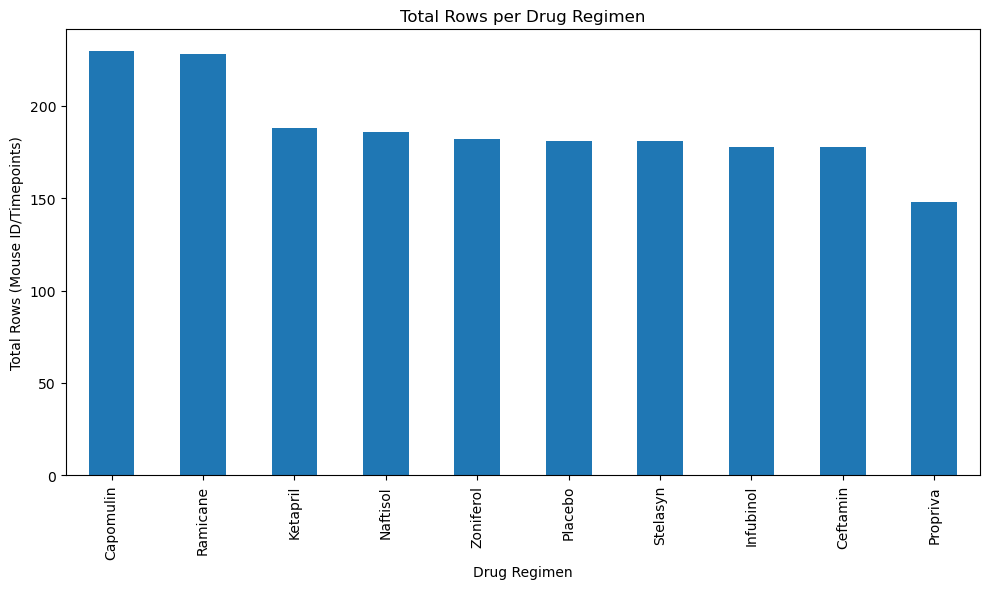

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_rows_per_regimen = clean_data['Drug Regimen'].value_counts()

bar_plot = total_rows_per_regimen.plot(kind='bar', title='Total Rows per Drug Regimen', figsize=(10, 6))
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Total Rows (Mouse ID/Timepoints)')

plt.tight_layout()
plt.show()

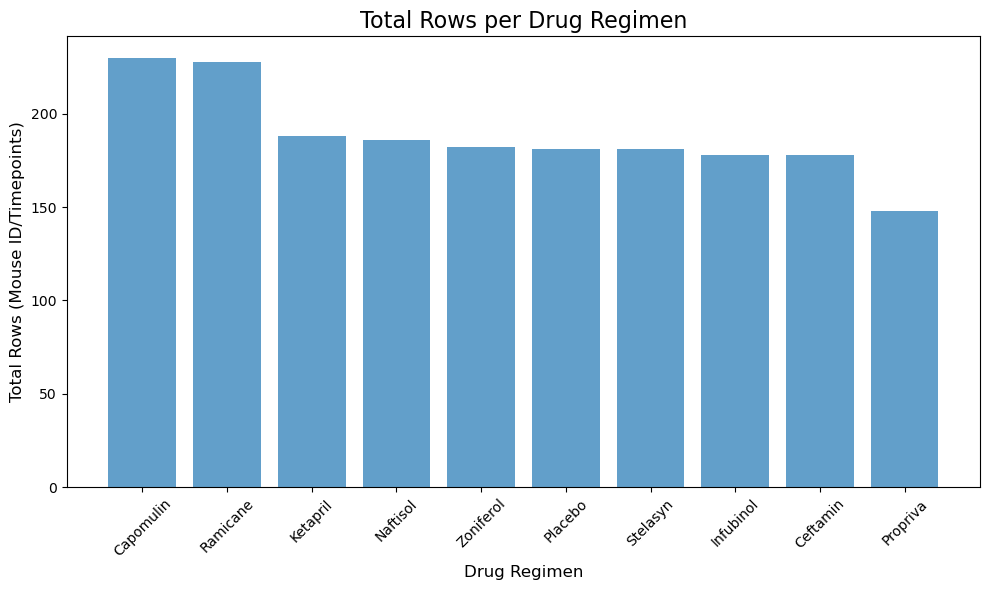

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows_per_regimen = clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(total_rows_per_regimen.index, total_rows_per_regimen.values, alpha=0.7)
plt.title('Total Rows per Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Total Rows (Mouse ID/Timepoints)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


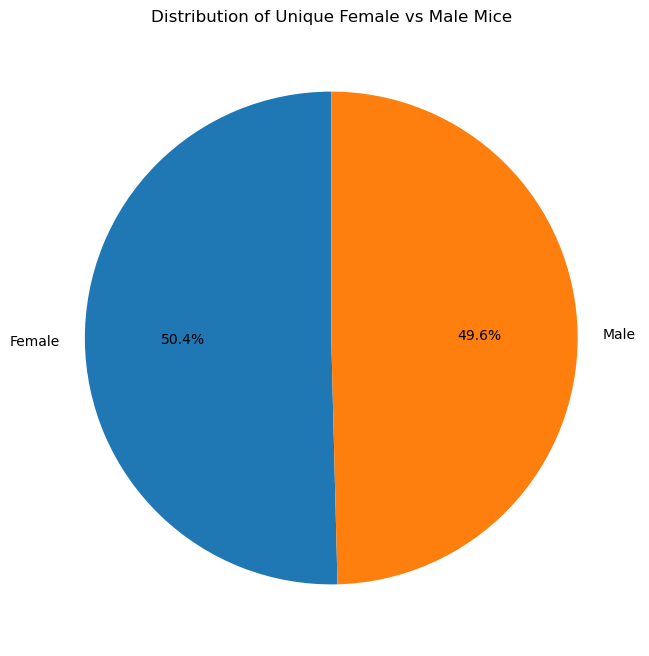

In [68]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
unique_mice_gender.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title='Distribution of Unique Female vs Male Mice',
    labels=['Female', 'Male'],  # Explicit labeling
    ylabel=''
)
plt.show()


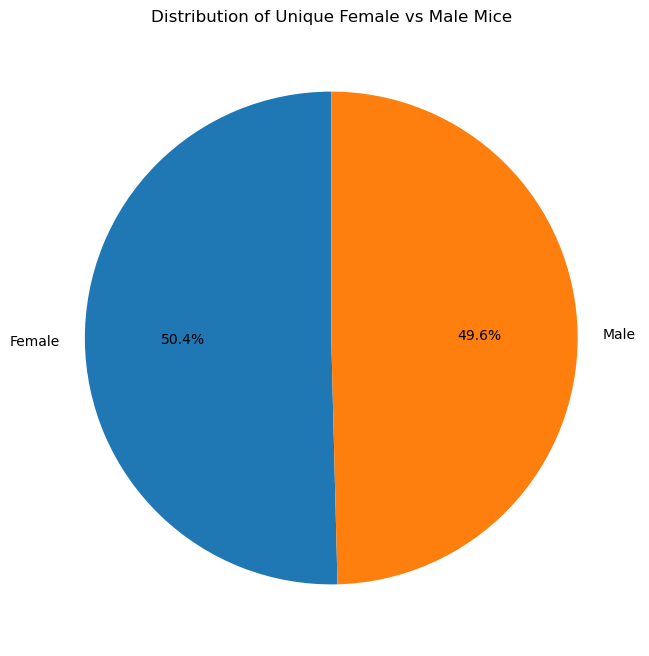

In [69]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
unique_mice_gender.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title='Distribution of Unique Female vs Male Mice',
    labels=['Female', 'Male'],  # Explicit labeling
    ylabel=''
)
plt.show()


## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(filtered_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

print(final_tumor_volume)


   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
tumor_vol_data
outliers_dict = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    

    # add subset
    quartile_1 = treatment_data.quantile(0.25)
    quartile_3 = treatment_data.quantile(0.75)
    iqr = quartile_3 - quartile_1

    # Determine outliers using upper and lower bounds
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


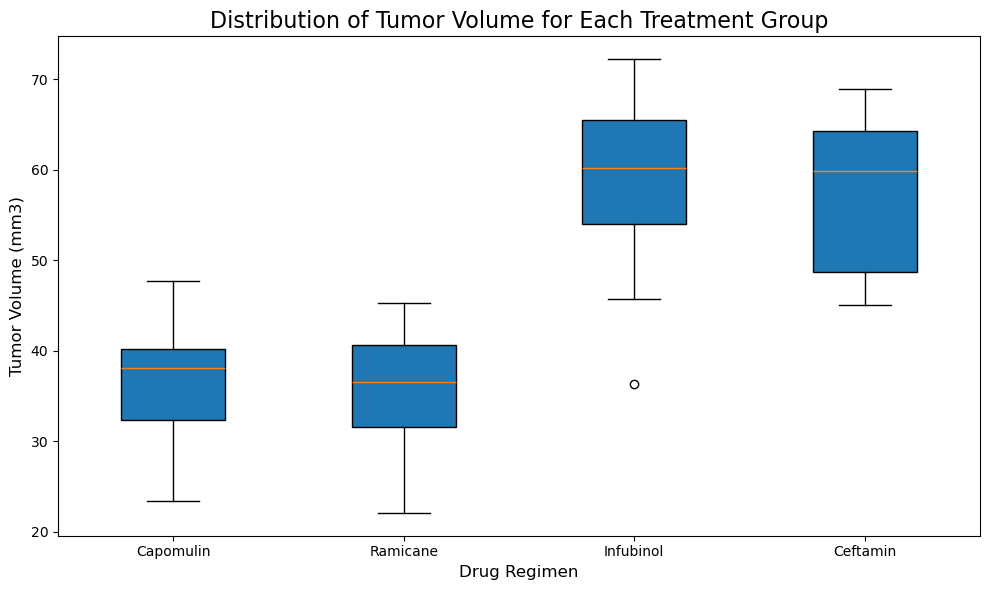

In [77]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_data.dropna().values)  # Drop NaN and add to the list

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

plt.title('Distribution of Tumor Volume for Each Treatment Group', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

plt.tight_layout()
plt.show()

## Line and Scatter Plots

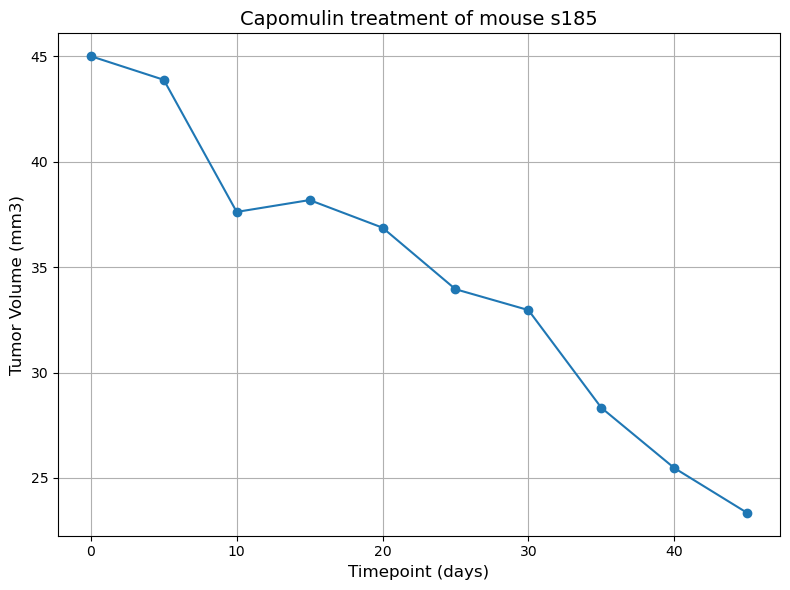

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = capomulin_data['Mouse ID'].iloc[0]
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f"Capomulin treatment of mouse {mouse_id}", fontsize=14)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



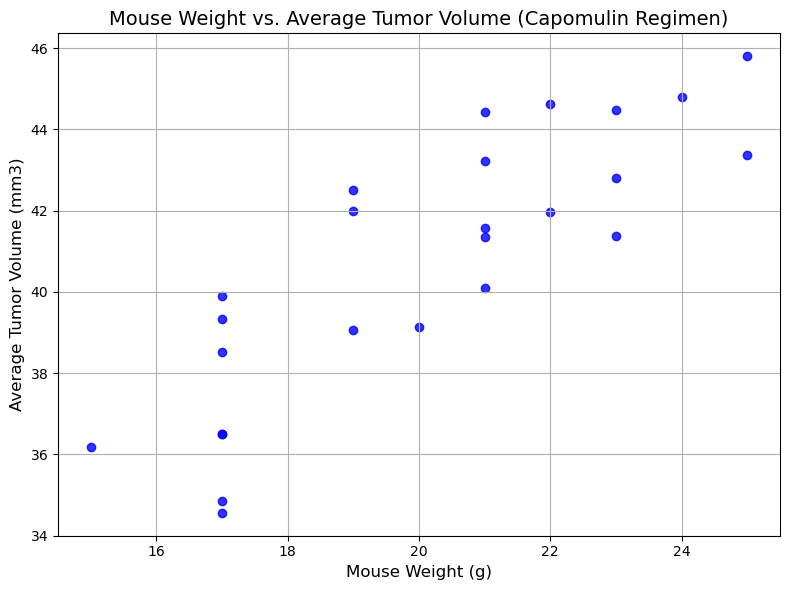

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

capomulin_avg_tumor = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'], alpha=0.8, color='blue')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


## Correlation and Regression

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
capomulin_avg_tumor = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)

# Extract mouse weight and average tumor volume
x_values = capomulin_avg_tumor['Weight (g)']
y_values = capomulin_avg_tumor['Tumor Volume (mm3)']

# Check if x_values and y_values are not empty
if x_values.empty or y_values.empty:
    raise ValueError("No data available for mouse weight or tumor volume.")

# Calculate the correlation coefficient
correlation_coefficient = x_values.corr(y_values)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the correlation coefficient and regression details
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared Value: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

# Generate the scatter plot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, alpha=0.8, color='blue', label='Data Points')
plt.plot(x_values, slope * x_values + intercept, color='red', label='Regression Line')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'clean_data' is not defined